# Распознавание рукописных цифр из набора данных MNIST с помощью Keras


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [1]:
!pip install Pillow

In [2]:
!pip install scipy==1.2.2

     |████████████████████████████████| 24.8 MB 38 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [4]:
# В Keras встроены средства работы с популярными наборами данных
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:     `toimage` is deprecated!
    `toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use Pillow's ``Image.fromarray`` directly instead.
  


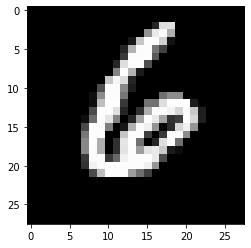

In [5]:
n = 13
plt.imshow(toimage(x_train_org[n]).convert('RGBA'))
plt.show()

**Преобразование размерности данных в наборе**

In [6]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

**Нормализация данных**

In [7]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train.astype('float32')
x_train = x_train / 255 

**Работа с правильными ответами**

In [8]:
print(y_train_org[n])

6


**Преобразуем метки в формат one hot encoding**

In [9]:
y_train = utils.to_categorical(y_train_org, 10)

**Правильный ответ в формате one hot encoding**

In [10]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [11]:
model = Sequential()

**Добавляем уровни сети**

Архитектуру сети взяли по ссылке - https://en.wikipedia.org/wiki/MNIST_database


In [12]:
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [13]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [14]:
model.fit(x_train, y_train, batch_size=200, epochs=20,  verbose=1)

Epoch 1/20
300/300 [==============================] - 4s 4ms/step - loss: 0.2753 - accuracy: 0.9220
Epoch 2/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1100 - accuracy: 0.9686
Epoch 3/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0714 - accuracy: 0.9794
Epoch 4/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0505 - accuracy: 0.9852
Epoch 5/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0360 - accuracy: 0.9898
Epoch 6/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0271 - accuracy: 0.9929
Epoch 7/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0195 - accuracy: 0.9952
Epoch 8/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0152 - accuracy: 0.9964
Epoch 9/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0112 - accuracy: 0.9977
Epoch 10/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0086 - accuracy: 0.9983

## Сохраняем обученную нейронную сеть

Записываем обученную нейронную сеть в файл `mnist_dense.h5`

In [ ]:
model.save("mnist_dense.h5")


Проверяем, что файл сохранился

In [ ]:
!ls

mnist_dense.h5	sample_data


**Сохраняем файлы на локальный компьютер**

In [ ]:
files.download("mnist_dense.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Если хотите использовать обученную нейронную сеть на своем компьютере:

```
from keras.models import load_model
model = load_model('mnist_dense.h5')
```

## Используем сеть для распознавания рукописных цифр

In [15]:
n_rec = 487

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:     `toimage` is deprecated!
    `toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


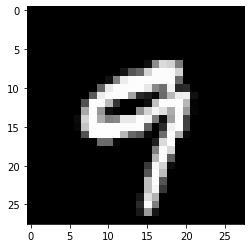

In [16]:
plt.imshow(toimage(x_test_org[n_rec]).convert('RGBA'))
plt.show()

**Меняем размерность изображения и нормализуем его**

In [17]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [18]:
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [19]:
print(prediction)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


**Преобразуем результаты из формата one hot encoding**

In [20]:
prediction = np.argmax(prediction)
print(prediction)

9


**Печатаем правильный ответ**

In [21]:
print(y_test_org[n_rec])

9


## Загружаем свою картинку

In [22]:
files.upload()

Saving 3.jpg to 3.jpg


{'3.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 85\n\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x02X\x02X\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00\x1a\x01\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x0

Проверяем загрузку картинки

In [23]:
!ls

3.jpg  sample_data


Загружаем картинку из файла

In [24]:
img_path = '3.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показываем картинку

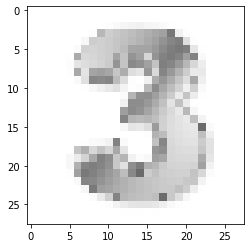

In [25]:
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [26]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [27]:
prediction = model.predict(x)

Результаты распознавания

In [28]:
prediction

array([[3.1616742e-07, 1.5940673e-04, 1.1721007e-02, 9.8792124e-01,
        4.2189793e-12, 1.4049695e-04, 5.6765592e-10, 9.7826423e-09,
        5.7334670e-05, 2.4164441e-07]], dtype=float32)

In [29]:
print(np.argmax(prediction))

3


## Домашнее задание


1.  Сохранить копию ноутбука себе в Google Drive (File->Save a copy in Drive...)
2.  Научитесь запускать ноутбук, обучать сеть и использовать ее для распознавания рукописных цифр MNIST.
3. Попробуйте сами написать рукописную цифру и распознать ее с помощью сети.
4. Попробуйте улучшить качества работы сети.





## Установка Keras и TensorFlow на свой компьютер

Все домашние задания в курсе можно сделать на платформе Google Colaboratory. Ноутбуки с Google Colaboratory останутся у вас после завершения курса, и вы сможете их запускать. Поэтому устанавливать Keras и TensorFlow на свой компьютер для выполнения заданий в курсе не обязательно. Более того, мы не рекомендуем это делать, т.к. установка иногда может быть очень сложной и на нее тратится много времени. Но если вы все-таки хотите установить библиотеки себе, то вот инструкции:

1. [Установка TensorFlow в Anaconda с помощью pip](https://www.asozykin.ru/deep_learning/2018/03/30/TensorFlow-Anaconda-Pip-Install.html).
2. [Установка Keras с TensorFlow в Anaconda](https://www.asozykin.ru/deep_learning/2017/09/07/Keras-Installation-TensorFlow.html).

Сразу хотим предупредить, что инструкции срабатывают не всегда. Но у большинства установить получается.